## Biased Random-Key Genetic Algorithm

__Placement Procedure__

In [2]:
import math
import time
import random
import numpy as np
import pandas as pd
import concurrent.futures
from PlacementHeuristics import PlacementProcedure, generateInputs
from BRKGA import BRKGA

import matplotlib.pyplot as plt

__Evolutionary Process__

In [6]:
inputs = {
    'p': [188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145],
    'q': [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80],
    'r': [58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96],
    'L': [610, 610, 610, 610],
    'W': [244, 244, 244, 244],
    'H': [259, 259, 259, 259]
}

inputs = {'v':list(zip(inputs['p'], inputs['q'], inputs['r'])), 'V':list(zip(inputs['L'], inputs['W'], inputs['H']))}
print('number of boxes:',len(inputs['v']))

number of boxes: 105


In [12]:
start_time = time.time()

model = BRKGA(inputs, num_generations = 100, num_individuals=40, num_elites = 10, num_mutants = 6, eliteCProb = 0.7)
model.fit(verbose = True)
print('used bins:',model.used_bins)
print('time:',time.time() - start_time)


Initial Population:
  ->  shape: (40, 210)
  ->  Best Fitness: 3.3309609759488823
Generation : 0  	(Best Fitness: 3.092016614456819 )
Generation : 1  	(Best Fitness: 3.092016614456819 )
Generation : 2  	(Best Fitness: 3.092016614456819 )
Generation : 3  	(Best Fitness: 3.092016614456819 )
Generation : 4  	(Best Fitness: 3.092016614456819 )
Generation : 5  	(Best Fitness: 3.092016614456819 )
Generation : 6  	(Best Fitness: 3.092016614456819 )
Generation : 7  	(Best Fitness: 3.092016614456819 )
Generation : 8  	(Best Fitness: 3.092016614456819 )
Generation : 9  	(Best Fitness: 3.092016614456819 )
Generation : 10  	(Best Fitness: 3.092016614456819 )
Generation : 11  	(Best Fitness: 3.092016614456819 )
Early stop at iter 11
used bins: 3
time: 527.2073533535004


In [13]:
inputs['solution'] = model.solution
decoder = PlacementProcedure(inputs)
print('fitness:',decoder.evaluate())

fitness: 3.092016614456819


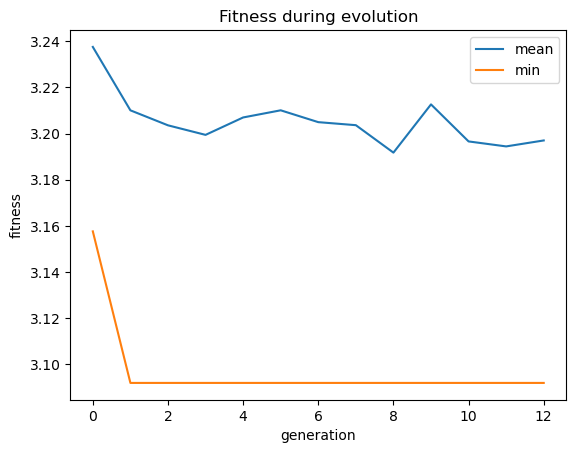

In [14]:
def plot_history(history, tick = 2):
    for target in ['mean', 'min']:
        plt.plot(history[target], label = target)
    plt.title('Fitness during evolution')
    plt.ylabel('fitness')
    plt.xlabel('generation')
    plt.xticks(np.arange(0, len(history['min']), tick))
    plt.legend()
    # h-line for integer
    for i in np.arange(math.ceil(min(history['min'])), int(max(history['mean']))+1):
        plt.axhline(y = i, color = 'g', linestyle = '-') 
    plt.show()

plot_history(model.history)


Container 0 :
No overlapping boxes.


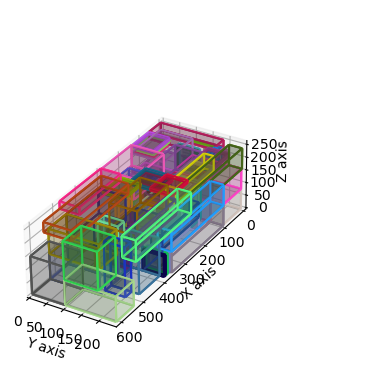

Container 1 :
No overlapping boxes.


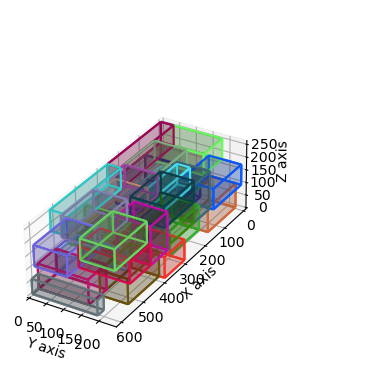

Container 2 :
No overlapping boxes.


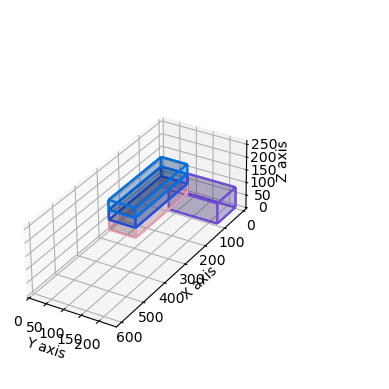

In [15]:
from plot_3D import plot_3D

V = (610, 244, 259)
def draw(decoder):
    for i in range(decoder.num_opend_bins):
        container = plot_3D(V=V)
        for box in decoder.Bins[i].load_items:
            container.add_box(box[0], box[1], mode = 'EMS')
        print('Container',i, ':')
        container.findOverlapping()
        container.show()
        
draw(decoder)

### Time

__experiments__

In [ ]:


# e = pd.DataFrame(columns = ['N', 'size', 'i','time_multi','time_serial'])
# for n in [3, 10, 20, 30, 40, 50]:
#     for i in range(5):

#         time_multi = time.time()
#         inputs = generateInputs(n,int(n/2))
#         model = BRKGA(inputs, num_generations = 10, num_individuals=n*10, num_elites =n*1, num_mutants = n*1.5, eliteCProb = 0.7)
#         model.fit(multiProcess=True, verbose = False)
#         time_multi = time.time() - time_multi
        
#         time_serial = time.time()
#         inputs = generateInputs(n,int(n/2))
#         model = BRKGA(inputs, num_generations = 10, num_individuals=n*10, num_elites =n*1, num_mutants = n*1.5, eliteCProb = 0.7)
#         model.fit(multiProcess=False, verbose = False)
#         time_serial = time.time() - time_serial
        
#         e = e.append({
#             'N': n,
#             'size': n*10,
#             'i': i,
#             'time_multi': time_multi,
#             'time_serial': time_serial
#         }, ignore_index=True)
# e.to_csv('experiments.csv', index = False)

__time complexity__

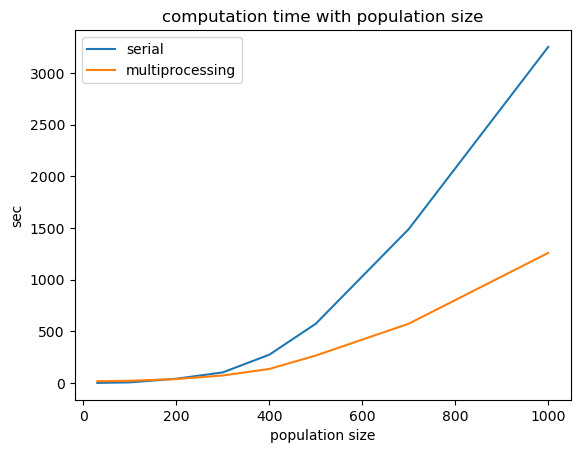

In [21]:
import matplotlib.pyplot as plt
time_df = pd.read_csv('time.csv')




multi_means = []
serial_means = []
for n in time_df['N'].unique():
    temp = time_df[time_df['N'] == n]
    multi_means.append(temp['time_multi'].mean())
    serial_means.append(temp['time_serial'].mean())
plt.plot(time_df['size'].unique(), serial_means, label = 'serial')
plt.plot(time_df['size'].unique(), multi_means, label = 'multiprocessing')
plt.title('computation time with population size')
plt.ylabel('sec')
plt.xlabel('population size')
plt.legend()
plt.show()